In [1]:
# Subir la base de datos
import pandas as pd

#Cargar BD, especificando la codificación 'latin-1'
df = pd.read_csv('/content/Flujos_de_caja.csv', sep=';', encoding='latin-1')

#Mostrar una parte de la base de datos
df.head()



,Proyecto,Inversion_Inicial,Ao_1,Ao_2,Ao_3,Ao_4,Ao_5,Ao_6,Ao_7,Ao_8,Ao_9,Ao_10
0,Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746
1,Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686
2,O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842
3,Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958
4,Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808


In [2]:
df['Proyecto'].value_counts()

,count
Proyecto,
Amaranta III la Eterna el Rojo de Itaca,1
Winston Smith,1
Julia,1
O'Brien,1
Big Brother,1
...,...
Lady Macbeth,1
Horacio,1
Polonio,1


In [3]:
print(df.columns)


Index(['Proyecto', 'Inversion_Inicial', 'Ao_1', 'Ao_2', 'Ao_3', 'Ao_4',
       'Ao_5', 'Ao_6', 'Ao_7', 'Ao_8', 'Ao_9', 'Ao_10'],
      dtype='object')


In [4]:
#Comprobar si hay valores nulos
df.isnull().sum()

,0
Proyecto,0
Inversion_Inicial,0
Ao_1,0
Ao_2,0
Ao_3,0
Ao_4,0
Ao_5,0
Ao_6,0
Ao_7,0
Ao_8,0


In [5]:
df.describe() #descripción de los datos

,Inversion_Inicial,Ao_1,Ao_2,Ao_3,Ao_4,Ao_5,Ao_6,Ao_7,Ao_8,Ao_9,Ao_10
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-6.011131e+07,1.491443e+07,1.543757e+07,1.494726e+07,1.508328e+07,1.499664e+07,1.452585e+07,1.474249e+07,1.507009e+07,1.500583e+07,1.493154e+07
std,2.326539e+07,5.670897e+06,5.730480e+06,5.745627e+06,5.854509e+06,5.835083e+06,5.823820e+06,5.783290e+06,5.863878e+06,5.864704e+06,5.829605e+06
min,-9.994527e+07,5.076218e+06,5.019675e+06,5.004138e+06,5.000917e+06,5.006464e+06,5.019156e+06,5.004677e+06,5.000037e+06,5.029882e+06,5.023382e+06
25%,-8.004509e+07,9.802492e+06,1.055513e+07,9.994844e+06,1.012155e+07,9.991937e+06,9.304432e+06,9.662194e+06,9.944576e+06,9.984148e+06,9.759860e+06
50%,-5.959744e+07,1.494401e+07,1.557866e+07,1.494062e+07,1.514997e+07,1.502767e+07,1.439013e+07,1.459236e+07,1.518330e+07,1.441793e+07,1.517991e+07
75%,-3.956041e+07,1.958610e+07,2.040920e+07,1.997789e+07,2.021412e+07,1.997109e+07,1.938830e+07,1.982090e+07,2.035117e+07,2.020567e+07,1.989067e+07
max,-2.006109e+07,2.499750e+07,2.499207e+07,2.497829e+07,2.499835e+07,2.499923e+07,2.497731e+07,2.496854e+07,2.494877e+07,2.499441e+07,2.498939e+07


In [6]:
!pip install numpy_financial #Instalamos la libreria
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/Flujos_de_caja.csv', index_col=0, sep=';', encoding='latin-1')
def calcular_vpn(tasa_descuento, flujos_caja):
    """Calcula el Valor Presente Neto (VPN)."""
    return npf.npv(tasa_descuento, flujos_caja)

def calcular_tir(flujos_caja):
    """Calcula la Tasa Interna de Retorno (TIR)."""
    return npf.irr(flujos_caja)

tasa_descuento = 0.10
resultados = {}

for proyecto, row in df.iterrows():
    inversion_inicial = float(row.iloc[0])
    flujos_caja_posteriores = [float(x) for x in row.iloc[1:].values]
    flujos_caja_total = [inversion_inicial] + flujos_caja_posteriores

    vpn = calcular_vpn(tasa_descuento, flujos_caja_total)
    tir = calcular_tir(flujos_caja_total)

    resultados[proyecto] = {'VPN': vpn, 'TIR': tir}


print("\n--- Resultados de Evaluación de Proyectos ---")
for proyecto, valores in resultados.items():
    vpn_str = f"${valores['VPN']:.2f}"
    tir_str = f"{valores['TIR'] * 100:.2f}%"
    print(f"Proyecto: {proyecto} | VPN: {vpn_str} | TIR: {tir_str}")



--- Resultados de Evaluación de Proyectos ---
Proyecto: Winston Smith | VPN: $-1509727.69 | TIR: 9.64%
Proyecto: Julia | VPN: $3814305.03 | TIR: 11.00%
Proyecto: O'Brien | VPN: $20175891.15 | TIR: 15.96%
Proyecto: Big Brother | VPN: $47124709.37 | TIR: 29.26%
Proyecto: Don Quijote | VPN: $62972205.30 | TIR: 41.90%
Proyecto: Sancho Panza | VPN: $26668518.87 | TIR: 22.75%
Proyecto: Dulcinea | VPN: $36506047.86 | TIR: 27.51%
Proyecto: Hamlet | VPN: $33098393.93 | TIR: 24.18%
Proyecto: Ofelia | VPN: $-8226142.68 | TIR: 8.09%
Proyecto: Claudio | VPN: $65671113.38 | TIR: 65.36%
Proyecto: Polonio | VPN: $68782168.90 | TIR: 51.70%
Proyecto: Horacio | VPN: $71457770.97 | TIR: 62.83%
Proyecto: Lady Macbeth | VPN: $62647678.83 | TIR: 61.15%
Proyecto: Macbeth | VPN: $-7103816.26 | TIR: 8.21%
Proyecto: Romeo | VPN: $47001724.35 | TIR: 29.33%
Proyecto: Julieta | VPN: $43769746.28 | TIR: 24.22%
Proyecto: Mercucio | VPN: $-3481533.39 | TIR: 9.15%
Proyecto: Tebaldo | VPN: $-641937.51 | TIR: 9.83%
Proy

Seleccione una opción:


Button(description='Visualizar datos', style=ButtonStyle())

Button(description='Calcular VPN/TIR', style=ButtonStyle())

Button(description='Graficar resultados', style=ButtonStyle())

Button(description='Salir', style=ButtonStyle())

Usted ha seleccionado el boton de graficar resultados


<ipython-input-8-f4943d69d746>:50: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-f4943d69d746>:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


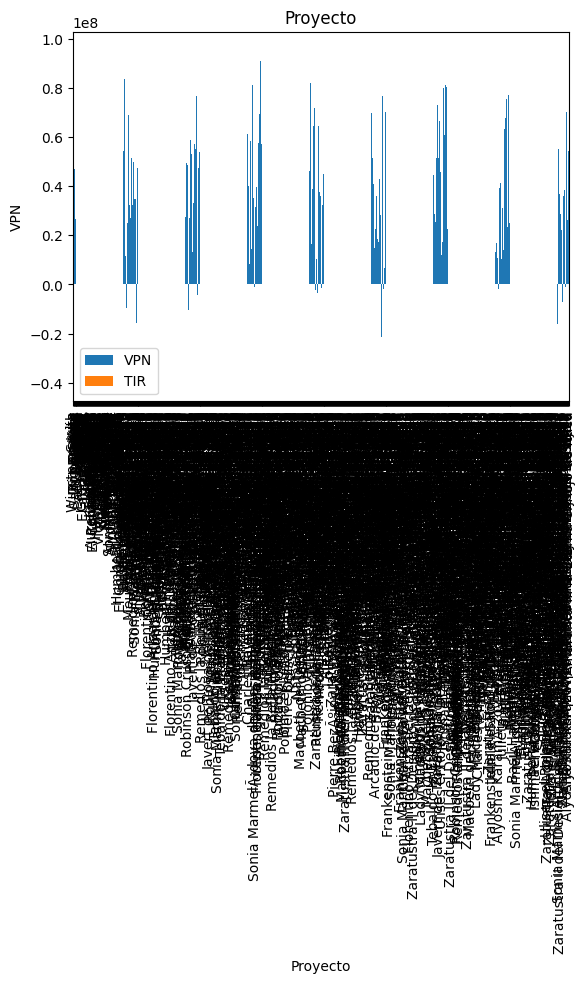

In [8]:
# Funcion para mostrar el menú interactivo con botones
def mostrar_menu():
    clear_output() # Limpia la pantalla
    print("Seleccione una opción:")

    # Crear los botones de cada opcion:
    boton_visualizar = widgets.Button(description="Visualizar datos")
    boton_calcular = widgets.Button(description="Calcular VPN/TIR")
    boton_graficar = widgets.Button(description="Graficar resultados")
    boton_salir = widgets.Button(description="Salir")

    # funciones que se ejecutan cuando se hacen clic en cada boton
    def boton_visualizar_click(b):
        print("Usted ha seleccionado el boton de visualizar datos")
        print(df.head())

    def boton_calcular_click(b):
        print("Usted ha seleccionado el boton de calcular VPN/TIR")
        print("\n--- Resultados de Evaluación de Proyectos ---")
        for proyecto, valores in resultados.items():
            vpn_str = f"${valores['VPN']:.2f}"
            tir_str = f"{valores['TIR'] * 100:.2f}%"
            print(f"Proyecto: {proyecto} | VPN: {vpn_str} | TIR: {tir_str}")
        # --- Encontrar e imprimir el proyecto con el VPN más alto ---
        proyecto_vpn_mas_alto = max(resultados, key=lambda item: resultados[item]['VPN'])
        vpn_mas_alto = resultados[proyecto_vpn_mas_alto]['VPN']
        print(f"\nEl proyecto con el VPN más alto es '{proyecto_vpn_mas_alto}' con un valor de ${vpn_mas_alto:,.2f}.")

        # --- Encontrar e imprimir el proyecto con el VPN más bajo ---
        proyecto_vpn_mas_bajo = min(resultados, key=lambda item: resultados[item]['VPN'])
        vpn_mas_bajo = resultados[proyecto_vpn_mas_bajo]['VPN']
        print(f"El proyecto con el VPN más bajo es '{proyecto_vpn_mas_bajo}' con un valor de ${vpn_mas_bajo:,.2f}.")

        # --- Encontrar e imprimir el proyecto con la TIR más alta ---
        proyecto_tir_mas_alto = max(resultados, key=lambda item: resultados[item]['TIR'])
        tir_mas_alto = resultados[proyecto_tir_mas_alto]['TIR']
        print(f"El proyecto con la TIR más alta es '{proyecto_tir_mas_alto}' con una tasa de {tir_mas_alto * 100:.2f}%.")

       # --- Encontrar e imprimir el proyecto con la TIR más baja ---
        proyecto_tir_mas_bajo = min(resultados, key=lambda item: resultados[item]['TIR'])
        tir_mas_bajo = resultados[proyecto_tir_mas_bajo]['TIR']
        print(f"El proyecto con la TIR más baja es '{proyecto_tir_mas_bajo}' con una tasa de {tir_mas_bajo * 100:.2f}%.")

    def boton_graficar_click(b):
        print("Usted ha seleccionado el boton de graficar resultados")
        df_vpn_str = pd.DataFrame.from_dict(resultados, orient='index')
        plot_vpn = df_vpn_str.plot(kind='bar', title='Proyecto')
        plot_vpn.set_xlabel('Proyecto')
        plot_vpn.set_ylabel('VPN')
        plt.tight_layout()
        plt.show()


    def boton_salir_click(b):
        clear_output()
        print("Usted ha seleccionado el boton de salir")


    # Conexion del boton con la funcion respectiva
    boton_visualizar.on_click(boton_visualizar_click)
    boton_calcular.on_click(boton_calcular_click)
    boton_graficar.on_click(boton_graficar_click)
    boton_salir.on_click(boton_salir_click)

    # Mostrar los botones en la pantalla
    display(boton_visualizar, boton_calcular, boton_graficar, boton_salir)

# ejecutar el menu
mostrar_menu()

###¿Qué proyectos tienen un VPN positivo y son rentables?


In [ ]:
print("\n--- Proyectos con VPN Positivo ---")
proyectos_vpn_positivo = {}
for proyecto, valores in resultados.items():
    if valores['VPN'] is not None and valores['VPN'] > 0:
        proyectos_vpn_positivo[proyecto] = valores['VPN']
        print(f"El proyecto '{proyecto}' tiene un VPN de ${valores['VPN']:.2f}")



--- Proyectos con VPN Positivo ---
El proyecto 'Julia' tiene un VPN de $3814305.03
El proyecto 'O'Brien' tiene un VPN de $20175891.15
El proyecto 'Big Brother' tiene un VPN de $47124709.37
El proyecto 'Don Quijote' tiene un VPN de $62972205.30
El proyecto 'Sancho Panza' tiene un VPN de $26668518.87
El proyecto 'Dulcinea' tiene un VPN de $36506047.86
El proyecto 'Hamlet' tiene un VPN de $33098393.93
El proyecto 'Claudio' tiene un VPN de $65671113.38
El proyecto 'Polonio' tiene un VPN de $68782168.90
El proyecto 'Horacio' tiene un VPN de $71457770.97
El proyecto 'Lady Macbeth' tiene un VPN de $62647678.83
El proyecto 'Romeo' tiene un VPN de $47001724.35
El proyecto 'Julieta' tiene un VPN de $43769746.28
El proyecto 'Ariel' tiene un VPN de $6488430.41
El proyecto 'CalibÃ¡n' tiene un VPN de $49075369.70
El proyecto 'Gregor Samsa' tiene un VPN de $18130273.00
El proyecto 'Josef K' tiene un VPN de $9056503.29
El proyecto 'El agrimensor K' tiene un VPN de $44650287.87
El proyecto 'Meursault'

In [ ]:
print("\n--- Proyectos con VPN negativo ---")
proyectos_vpn_negativo = {}
for proyecto, valores in resultados.items():
    if valores['VPN'] is not None and valores['VPN'] < 0:
        proyectos_vpn_negativo[proyecto] = valores['VPN']
        print(f"El proyecto '{proyecto}' tiene un VPN de ${valores['VPN']:.2f}")


--- Proyectos con VPN negativo ---
El proyecto 'Winston Smith' tiene un VPN de $-1509727.69
El proyecto 'Ofelia' tiene un VPN de $-8226142.68
El proyecto 'Macbeth' tiene un VPN de $-7103816.26
El proyecto 'Mercucio' tiene un VPN de $-3481533.39
El proyecto 'Tebaldo' tiene un VPN de $-641937.51
El proyecto 'Benvolio' tiene un VPN de $-2566692.43
El proyecto 'TelÃ©maco' tiene un VPN de $-10890423.06
El proyecto 'Arcadio' tiene un VPN de $-5186942.03
El proyecto 'Florentino Ariza' tiene un VPN de $-18351007.67
El proyecto 'El monstruo' tiene un VPN de $-1305765.93
El proyecto 'Viernes' tiene un VPN de $-11634357.04
El proyecto 'Anna KarÃ©nina' tiene un VPN de $-3117091.56
El proyecto 'Alexei Vronsky' tiene un VPN de $-909322.05
El proyecto 'Sonia MarmelÃ¡dova' tiene un VPN de $-790069.60
El proyecto 'Lotte' tiene un VPN de $-23025598.83
El proyecto 'Cosette' tiene un VPN de $-6126373.93
El proyecto 'Nietzsche' tiene un VPN de $-2104701.15
El proyecto 'Frankenstein III' tiene un VPN de $-

##¿Qué proyectos tienen una TIR mayor que la tasa de descuento?



In [ ]:
print("\n--- Proyectos con TIR mayor a la tasa de descuento ---")
proyectos_tir_mayor = {}
for proyecto, valores in resultados.items():
    if valores['TIR'] is not None and valores['TIR'] > 0.10:
        proyectos_tir_mayor[proyecto] = valores['TIR']
        print(f"El proyecto '{proyecto}' tiene una TIR de {valores['TIR']*100:.2f}%")


--- Proyectos con TIR mayor a la tasa de descuento ---
El proyecto 'Julia' tiene una TIR de 11.00%
El proyecto 'O'Brien' tiene una TIR de 15.96%
El proyecto 'Big Brother' tiene una TIR de 29.26%
El proyecto 'Don Quijote' tiene una TIR de 41.90%
El proyecto 'Sancho Panza' tiene una TIR de 22.75%
El proyecto 'Dulcinea' tiene una TIR de 27.51%
El proyecto 'Hamlet' tiene una TIR de 24.18%
El proyecto 'Claudio' tiene una TIR de 65.36%
El proyecto 'Polonio' tiene una TIR de 51.70%
El proyecto 'Horacio' tiene una TIR de 62.83%
El proyecto 'Lady Macbeth' tiene una TIR de 61.15%
El proyecto 'Romeo' tiene una TIR de 29.33%
El proyecto 'Julieta' tiene una TIR de 24.22%
El proyecto 'Ariel' tiene una TIR de 12.11%
El proyecto 'CalibÃ¡n' tiene una TIR de 35.84%
El proyecto 'Gregor Samsa' tiene una TIR de 14.66%
El proyecto 'Josef K' tiene una TIR de 12.34%
El proyecto 'El agrimensor K' tiene una TIR de 30.65%
El proyecto 'Meursault' tiene una TIR de 15.60%
El proyecto 'Clamence' tiene una TIR de 26

##¿Cómo se relacionan el VPN y la TIR con la toma de decisiones sobre proyectos de inversión?

##VPN
*¿Qué es?*

El VPN calcula el valor actual de todos los flujos de caja futuros esperados de un proyecto, descontados a una tasa de descuento específica (que generalmente representa el costo de capital de la empresa o la tasa de rendimiento mínima aceptable), menos la inversión inicial.


Regla de Decisión:


*VPN > 0*: El proyecto se considera rentable y agrega valor a la empresa. Debería ser aceptado.


*VPN = 0*: El proyecto no agrega ni destruye valor. La decisión podría depender de otros factores estratégicos.


*VPN < 0*: El proyecto se considera no rentable y destruye valor. Debería ser rechazado.


##TIR
¿Qué es?

La TIR es la tasa de descuento a la cual el VPN de un proyecto se iguala a cero. En otras palabras, es la tasa de rendimiento que el proyecto espera generar.


Regla de Decisión (en comparación con la tasa de descuento):


TIR > Tasa de Descuento: El proyecto se considera rentable porque su rendimiento esperado es mayor que el costo de capital o la tasa mínima aceptable. Debería ser aceptado.


TIR = Tasa de Descuento: El proyecto no genera valor adicional más allá de la tasa requerida. La decisión podría depender de otros factores.


TIR < Tasa de Descuento: El proyecto se considera no rentable porque su rendimiento esperado es menor que el costo de capital o la tasa mínima aceptable. Debería ser rechazado.




#Relación entre el VPN y la TIR

- El VPN y la TIR nos ayudan a determinar si un proyecto es rentable o no. Nos ayudan brindar criterios claros, por lo tanto son tan importantes en la toma de decisiones
- En ocasiones la TIR puede ser mas facil de entender al ser expresada en forma porcentual